# Chocolate Scraping with Beautiful Soup

In [8]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
webpage = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html')
soup = BeautifulSoup(webpage.content, "html.parser")
print(soup)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>
<script async="" src="/cdn-cgi/bm/cv/669835187/api.js"></script></head>
<body>
<!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
<div id="banner">
<h1>Cacao Ratings</h1>
</div>
<div id="infoContainer">
<table class="infoTable">
<tr>
<td>Compiled ratings of over 1700 Chocolate bars</td>
</tr>
<tr>
<td>Ratings are from 1-5</td>
</tr>
</table>
</div>
<div id="picContainer">
<img id="chocolate" src="chocolate.jpg"/>
</div>
<

In [4]:
chocolate_ratings = soup.find_all(attrs={"class": "Rating"}) #one way of finding the ratings using class
ratings = []
for points in chocolate_ratings[1:]:
  ratings.append(float(points.string))

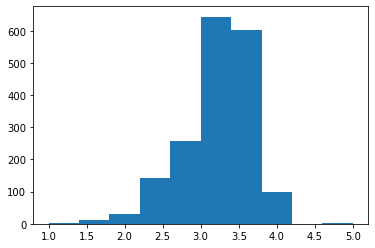

In [5]:
plt.hist(ratings)
plt.show()

In [6]:
chocolate_comp = soup.select(".Company") #another way to find content using .select()
company = []
for names in chocolate_comp[1:]:
    company.append(names.string)

In [11]:
#Creating a DataFrame using Company name and Rating
dictionary = {"Company_Name": company, "Rating": ratings}
chocolate_df = pd.DataFrame.from_dict(dictionary)
chocolate_df.head(10)

,Company_Name,Rating
0,A. Morin,3.75
1,A. Morin,2.75
2,A. Morin,3.00
3,A. Morin,3.50
4,A. Morin,3.50
5,A. Morin,2.75
6,A. Morin,3.50
7,A. Morin,3.50
8,A. Morin,3.75
9,A. Morin,4.00


In [20]:
mean_vals = chocolate_df.groupby("Company_Name").Rating.mean()
ten_best = mean_vals.nlargest(10)
print(ten_best)

Company_Name
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Rating, dtype: float64


In [17]:
cocoa_pct = soup.select(".CocoaPercent")
pct = []
for percent in cocoa_pct[1:]:
    pct.append(int(round(float(percent.string[:-1])))) #Remove the '%' from the string and round up to make integers

In [18]:
#Creating a DataFrame using Company name and Rating and CocoaPercentage
dictionary = {"Company_Name": company, "Rating": ratings, 'CocoaPercentage': pct}
chocolate_df = pd.DataFrame.from_dict(dictionary)

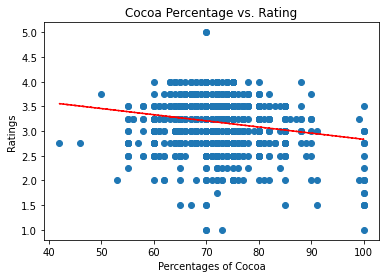

In [25]:
plt.scatter(chocolate_df.CocoaPercentage,chocolate_df.Rating)
z = np.polyfit(chocolate_df.CocoaPercentage, chocolate_df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(chocolate_df.CocoaPercentage, line_function(chocolate_df.CocoaPercentage), "r--")
plt.ylabel("Ratings")
plt.xlabel("Percentages of Cocoa")
plt.title("Cocoa Percentage vs. Rating")
plt.show()